# Classification

## Import libraries

In [1]:
from pycaret.datasets import get_data
from pycaret.classification import *
from pycaret.utils import check_metric

import plotly.express as px

from sklearn.model_selection import train_test_split

## Load dataset

With pycaret comes a lot of datasets that we can access using `get_data` function.

In [2]:
get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


Let's load the *cancer* dataset that includes several features of 683 breast cancer patients. 

In [3]:
df = get_data('cancer')

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,5,1,1,1,2,1,3,1,1
1,0,5,4,4,5,7,10,3,2,1
2,0,3,1,1,1,2,2,3,1,1
3,0,6,8,8,1,3,4,3,7,1
4,0,4,1,1,3,2,1,3,1,1


In [4]:
df.describe()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,0.349927,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221
std,0.477296,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,0.000000,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,1.000000,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


### Split data into a [Training set and a Test set](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In supervised machine learning, a key question regards the evaluation of models - how good are they? Just like statistics uses things like $R^2$ as a goodness-of-fit measure, the machine learning pipeline is equipped with methods of measuring a model's quality. To do this without a bias, we cannot test the model on the same data it was trained on - but on a separate test set. We therefore split the data like below.

**75% for training and 25% for testing (by default)** 

Fix a `random_state` for reproducibility: `train_test_split` splits arrays or matrices into random train and test subsets. That means that everytime you run it without specifying random_state, you will get a different result. If you seed your random number generator with a fixed number (say 42), your split will be always the same. 
![title](assets/Train_test_sets.jpg)

Pycaret will do the splitting automatically but we can still save part of the data to test on the finalized model. This way we can test the finalized model using completely new "unseen" data .

In [35]:
# split dataset to data and target
data = df.iloc[:,1:]
target = df['Class']

# split to train and test. Set test_size to 0.05 since pycaret will automatically do the 70/30 split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, random_state=42, test_size=0.05)

In [36]:
X_train.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
563,1,1,1,1,2,1,2,1,1
467,9,10,10,10,10,5,10,10,10
380,1,2,3,1,2,1,2,1,1
109,8,6,4,3,5,9,3,1,1
72,10,6,4,1,3,4,3,2,3


## Visualizing

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# easy function for plotting features
def boxplot(data, x, y):
    plt.figure(figsize = (10,7))

    # Usual boxplot
    ax = sns.boxplot(x=x, y=y, data=data)
 
    # Add jitter with the swarmplot function.
    ax = sns.swarmplot(x=x, y=y, data=data, color="grey")

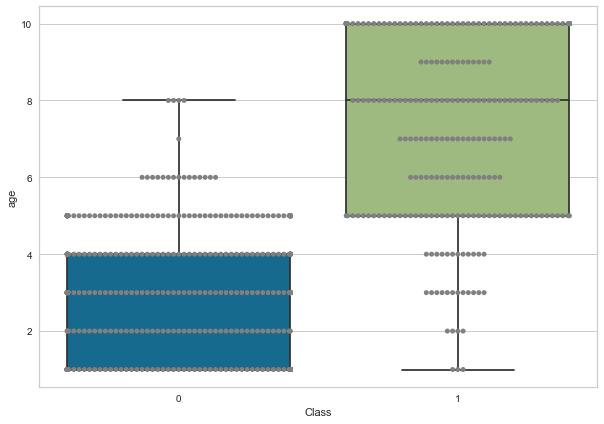

In [8]:
# plot age and class
boxplot(df, 'Class', 'age')

## Train the model

### Preprocessing
**Normalization**: Normalization / Scaling (often used interchangeably with standardization) is used to transform the actual values of numeric variables in a way that provides helpful properties for machine learning. Many algorithms such as Logistic Regression, Support Vector Machine, K Nearest Neighbors and Naive Bayes assume that all features are centered around zero and have variances that are at at the same level of order. If a particular feature in a dataset has a variance that is larger in order of magnitude than other features, the model may not understand all features correctly and could perform poorly. For instance, in the dataset we are using for this example the AGE feature ranges between 21 to 79 while other numeric features range from 10,000 to 1,000,000. <a href="https://sebastianraschka.com/Articles/2014_about_feature_scaling.html#z-score-standardization-or-min-max-scaling">Read more</a>

**Transformation**: While normalization transforms the range of data to remove the impact of magnitude in variance, transformation is a more radical technique as it changes the shape of the distribution so that transformed data can be represented by a normal or approximate normal distirbution. In general, you should transform the data if using algorithms that assume normality or a gaussian distribution. Examples of such models are Logistic Regression, Linear Discriminant Analysis (LDA) and Gaussian Naive Bayes. (Pro tip: any method with “Gaussian” in the name probably assumes normality.) <a href="https://en.wikipedia.org/wiki/Power_transform">Read more</a>

### Classification in Pycaret

`setup()` is Pycaret's main function and it needs to be run before executing any other function in pycaret. The `setup()` function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment.

`session_id` parameter is equivalent to ‘random_state’ in scikit-learn. Let's use 42 for reproducibility.

In [9]:
# when doing classification, setup() takes two mandatroy parameters: data and target
s = setup(X_train, target=y_train, normalize = True, session_id=42)

,Description,Value
0,Session id,42
1,Target,Class
2,Target type,Binary
3,Original data shape,"(512, 10)"
4,Transformed data shape,"(512, 10)"
5,Transformed train set shape,"(358, 10)"
6,Transformed test set shape,"(154, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [10]:
# 
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


Pycaret runs all different ML algorhitms using default parameters. We can compare all models using `compare_models()` which puts all models in order from best to worst.

In [11]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9749,0.9832,0.9583,0.9697,0.9622,0.9435,0.9454,0.0590
et,Extra Trees Classifier,0.9749,0.9972,0.9667,0.9626,0.9617,0.9432,0.9462,0.1760
lda,Linear Discriminant Analysis,0.9748,0.9962,0.9500,0.9763,0.9615,0.9429,0.9446,0.0510
ridge,Ridge Classifier,0.9721,0.0000,0.9417,0.9763,0.9572,0.9365,0.9384,0.0390
rf,Random Forest Classifier,0.9721,0.9920,0.9667,0.9549,0.9577,0.9369,0.9401,0.2230
svm,SVM - Linear Kernel,0.9694,0.0000,0.9417,0.9678,0.9520,0.9296,0.9324,0.0370
gbc,Gradient Boosting Classifier,0.9693,0.9958,0.9667,0.9473,0.9545,0.9314,0.9341,0.1020
ada,Ada Boost Classifier,0.9664,0.9957,0.9500,0.9549,0.9494,0.9244,0.9276,0.1160
lr,Logistic Regression,0.9637,0.9951,0.9333,0.9612,0.9439,0.9173,0.9207,1.0300
lightgbm,Light Gradient Boosting Machine,0.9637,0.9986,0.9333,0.9609,0.9436,0.9169,0.9205,0.0720


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

This gives us lots of metrics we can use to evaluate the results:


**Accuracy** = $ \frac{Correctly\:predicted}{Total\:samples}$  <br>
It's simple and informative but doesn't give us the whole picture since sometimes e.g. false negative predictions should be minimized. <br><br>

**Precision** = $ \frac{True\:positive}{Total\:predicted\:positive}$ <br>
Precision is a measure to determine, how precise model's positive predictions are. If model is trying to predict spam-emails (1), low precision means that rate of false positives is high i.e. lots of valid emails (0) are classified as spam.<br> <br>

**Recall** = $ \frac{True\:positive}{Total\:actually\:positive}$ <br>
In other words how many actual positives are classified correctly. Using the same example, spam emails leak into your inbox as normal emails if recall is low. <br><br>

**F1** = $ 2* \frac{Precision*Recall}{Precision+Recall}$ <br>
F1 score tells the balance between precision and recall. It's similar to accuracy but takes false positives and negatives into account, making it better metric if false predictions are significant. In addition if class distribution is uneven (e.g lots of negatives and only few positives), model may predict all negative, making accuracy high but F1-score low.


<img src="./assets/precisionrecall.png" width="400" height="500">

Let's make logistic regression model using 15 fold stratified cross validation.

In [12]:
lr = create_model('lr', fold = 15,  round = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.000,1.000,1.000,1.000,1.000,1.000,1.000
1,1.000,1.000,1.000,1.000,1.000,1.000,1.000
2,1.000,1.000,1.000,1.000,1.000,1.000,1.000
3,1.000,1.000,1.000,1.000,1.000,1.000,1.000
4,0.917,0.977,0.875,0.875,0.875,0.812,0.812
5,0.958,1.000,0.875,1.000,0.933,0.903,0.907
6,0.958,0.992,1.000,0.889,0.941,0.909,0.913
7,0.958,1.000,1.000,0.889,0.941,0.909,0.913
8,0.958,1.000,1.000,0.889,0.941,0.909,0.913


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

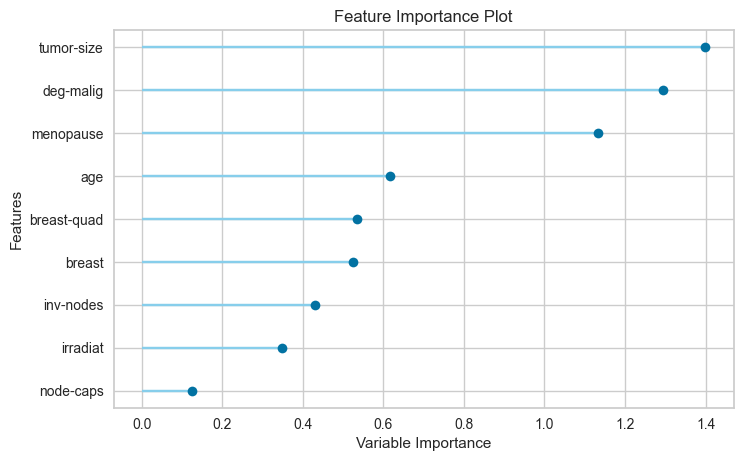

In [13]:
plot_model(lr, plot='feature')

<div class='alert alert-warning'>
<h4>Exercise 1. What is the most important feature? Make a plot using previously defined function boxplot and plot that feature.</h4>
</div>

In [ ]:
# %load solutions/pyc_1.py

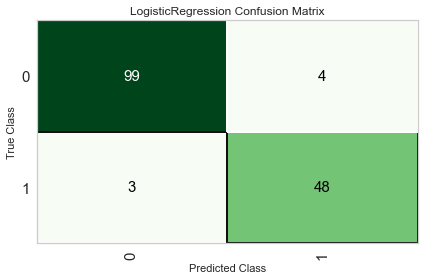

In [14]:
plot_model(lr, plot = 'confusion_matrix')

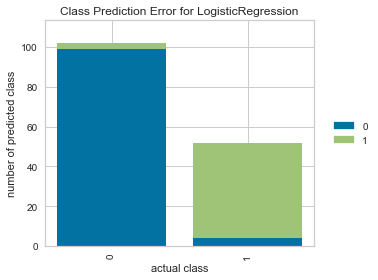

In [15]:
plot_model(lr, plot = 'error')

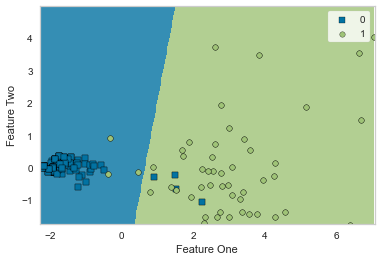

In [19]:
plot_model(lr, plot = 'boundary')

## Tune a model

When a model is created using the `create_model()` function it uses the default hyperparameters to train the model. In order to tune hyperparameters, the `tune_model()` function is used. This function automatically tunes the hyperparameters of a model using Random Grid Search on a pre-defined search space. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC by fold for the best model.

In [23]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9444,0.9687,0.9167,0.9167,0.9167,0.8750,0.8750
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9444,0.9931,1.0000,0.8571,0.9231,0.8800,0.8864
5,0.9722,1.0000,1.0000,0.9231,0.9600,0.9388,0.9405
6,0.9444,1.0000,0.8333,1.0000,0.9091,0.8696,0.8771
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9714,0.9928,1.0000,0.9231,0.9600,0.9378,0.9397


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


## Predict on test data

Before finalizing the model, it is advisable to perform one final check by predicting the test/hold-out set and reviewing the evaluation metrics. If you look at the information grid after running `setup()`, you will see that 30% (154 samples) of the data has been separated out as test/hold-out sample. All of the evaluation metrics we have seen above are cross validated results based on the training set (70%) only. Now, using our final trained model stored in the tuned_lr variable we will predict against the hold-out sample and evaluate the metrics to see if they are materially different than the CV results.

In [34]:
predict_model(tuned_lr);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9610,0.9941,0.9608,0.9245,0.9423,0.9129,0.9133


The accuracy of test set is `0.9610` compared to `0.9777` achieved with the train set. This is not significant difference but if there is a large variation between the test and train results, then this would normally indicate over-fitting but could also be due to several other factors and would require further investigation. In this case, we will move forward with finalizing the model and predicting on unseen data (the 5% that we had separated in the beginning and never exposed to PyCaret).

## Finalize model

The finalize_model() function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [37]:
final_lr = finalize_model(tuned_lr)

## Predict on unseen data

Now we can use the test data `X_test` and try to classify them with our trained model. For this we use pycaret's `predict_model()` function and pass the unseen testdata as parameter.

In [38]:
predictions = predict_model(lr, data=X_test) # pass the model and test-data as parameters
predictions.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Label,Score
292,1.270064,-0.041805,0.252055,2.211221,-0.115237,1.842244,-0.145405,0.075816,-0.348480,1,0.9503
145,1.270064,1.584939,1.232879,0.428300,3.023724,1.842244,1.561317,1.772194,3.250242,1,0.9997
211,-1.197208,-0.692502,-0.728769,-0.641453,-0.563660,-0.667570,-0.145405,-0.602736,-0.348480,0,0.9958
118,-1.197208,-0.692502,-0.401827,-0.284869,-0.563660,-0.667570,-0.145405,-0.602736,-0.348480,0,0.9923
302,-1.197208,-0.692502,-0.728769,-0.641453,-1.012083,-0.667570,-0.572086,-0.602736,-0.348480,0,0.9964


The *Label* and *Score* columns are added onto the X_test set. Label is the prediction and score is the probability of the prediction. Notice that predicted results are concatenated to the original dataset while all the transformations are automatically performed in the background. You can also check the metrics on this since you have actual target column `y_test` available. To do that we will use pycaret.utils module. You can do this easily with basic python, but this is good way if you want to check any other metrics (other than accuracy) as well. See example below:

In [44]:
from pycaret.utils import check_metric

# compare target and predicted labels
print("Prediction accuracy", check_metric(y_test, predictions['Label'], metric = 'Accuracy')) 
print("Prediction recall",check_metric(y_test, predictions['Label'], metric = 'Recall'))

Prediction accuracy 0.9714
Prediction recall 0.9333
